In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
df = pd.read_excel('PCOS.xlsx')
df.head()


,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.304017,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

## **DATA CLEANING**

In [4]:
df = df.drop('Unnamed: 44', axis=1) # Preprocessing Data yang tidak diperlukan

In [5]:
df

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.000,19.304017,15,78,22,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.500,24.921163,15,74,20,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.000,25.270891,11,72,18,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.000,29.674945,13,72,20,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.000,20.060954,11,72,18,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537,537,0,35,50.0,164.592,18.456637,17,72,16,...,0,0.0,0,110,70,1,0,17.5,10.0,6.7
537,538,538,0,30,63.2,158.000,25.316456,15,72,18,...,0,0.0,0,110,70,9,7,19.0,18.0,8.2
538,539,539,0,36,54.0,152.000,23.372576,13,74,20,...,0,0.0,0,110,80,1,0,18.0,9.0,7.3
539,540,540,0,27,50.0,150.000,22.222222,15,74,20,...,1,0.0,0,110,70,7,6,18.0,16.0,11.5


In [6]:
df.info() # Melihat atrribut-attribut yang ada pada dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

## **DATA TRANSFORMATION**

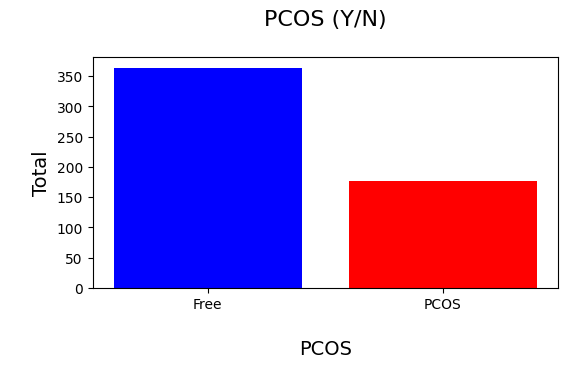

In [7]:
# Melihat hubungan PCOS antara Free ataupun PCOS
count = df["PCOS (Y/N)"].value_counts()
plt.figure(figsize=(6, 3))
plt.bar(['Free','PCOS'], count, color=['blue','red'])
plt.title('PCOS (Y/N)\n', size=16)
plt.xlabel('\nPCOS', size=14)
plt.ylabel('\nTotal', size=14)
plt.show()

## **FEATURE SELECTION**

In [8]:
# Data Splitting yang diperlukan dengan variabel independen yaitu X dan variabel dependen yaitu Y
fitur_kolom = [' Age (yrs)','BMI','Hb(g/dl)', 'Cycle(R/I)', 'FSH/LH', 'Waist:Hip Ratio']
X = df[fitur_kolom]
y = df["PCOS (Y/N)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## **ALGORITMA NAIVE BAYES**

In [9]:
# Algoritma Naive Bayes untuk klasifikasi PCOS
from tabulate import tabulate

clf = GaussianNB()

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

table = [["PCOS", "Total Accuracy", "Precision", "Recall", "F1 Score"],
         ["0", "", precision[0], recall[0], f1[0]],
         ["1", "", precision[1], recall[1], f1[1]],
         ["Total", accuracy, "", "", ""]]

print(tabulate(table, headers='firstrow'))

PCOS    Total Accuracy      Precision           Recall               F1 Score
------  ------------------  ------------------  -------------------  -------------------
0                           0.722972972972973   0.981651376146789    0.8326848249027238
1                           0.8666666666666667  0.24074074074074073  0.37681159420289856
Total   0.7361963190184049


## **ALGORITMA SUPPORT VECTOR MACHINE**

In [10]:
# Algoritma SVM untuk klasifikasi PCOS
from tabulate import tabulate
from sklearn.svm import SVC

clf = SVC(kernel='linear')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

table = [["PCOS", "Total Accuracy", "Precision", "Recall", "F1 Score"],
         ["0", "", precision[0], recall[0], f1[0]],
         ["1", "", precision[1], recall[1], f1[1]],
         ["Total", accuracy, "", "", ""]]

print(tabulate(table, headers='firstrow'))

PCOS    Total Accuracy      Precision           Recall              F1 Score
------  ------------------  ------------------  ------------------  ------------------
0                           0.8275862068965517  0.8807339449541285  0.8533333333333335
1                           0.723404255319149   0.6296296296296297  0.6732673267326733
Total   0.7975460122699386


## **ALGORITMA RANDOM FOREST**

In [11]:
# Algoritma Random Forest untuk klasifikasi PCOS
from tabulate import tabulate
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

table = [["PCOS", "Total Accuracy", "Precision", "Recall", "F1 Score"],
         ["0", "", precision[0], recall[0], f1[0]],
         ["1", "", precision[1], recall[1], f1[1]],
         ["Total", accuracy, "", "", ""]]

print(tabulate(table, headers='firstrow'))

PCOS    Total Accuracy      Precision           Recall              F1 Score
------  ------------------  ------------------  ------------------  ------------------
0                           0.7560975609756098  0.8532110091743119  0.8017241379310345
1                           0.6                 0.4444444444444444  0.5106382978723405
Total   0.7177914110429447


In [12]:
clf = GaussianNB()

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy : ",accuracy)
print("Precision : ",precision)
print("Recall : ",recall)
print("F1 Score : ",f1)

Accuracy :  0.7361963190184049
Precision :  0.7705770187365281
Recall :  0.7361963190184049
F1 Score :  0.681659337431616


## **PERBANDINGAN ANTARA NAIVE BAYES DAN SVM**

In [13]:
# Naive Bayes
clf = GaussianNB()

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred)
precision1 = precision_score(y_test, y_pred, average=None)
recall1 = recall_score(y_test, y_pred, average=None)

# SVM
clf = SVC(kernel='linear')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred)
precision2 = precision_score(y_test, y_pred, average=None)
recall2 = recall_score(y_test, y_pred, average=None)

table = [["Algoritma","Total Accuracy"],
        ["Naive Bayes", accuracy1],
        ["SVM", accuracy2]]

print(tabulate(table, headers='firstrow'))
print()

table1 = [["PCOS","Precision NB", "Precision SVM"],
        ["0", precision1[0], precision2[0]],
        ["1", precision1[1], precision2[1]]]

print(tabulate(table1, headers='firstrow'))
print()

table2 = [["PCOS","Recall NB", "Recall SVM"],
        ["0", recall1[0], recall2[0]],
        ["1", recall1[1], recall2[1]]]

print(tabulate(table2, headers='firstrow'))

Algoritma      Total Accuracy
-----------  ----------------
Naive Bayes          0.736196
SVM                  0.797546

  PCOS    Precision NB    Precision SVM
------  --------------  ---------------
     0        0.722973         0.827586
     1        0.866667         0.723404

  PCOS    Recall NB    Recall SVM
------  -----------  ------------
     0     0.981651      0.880734
     1     0.240741      0.62963


## OPTIMALISASI MODEL NAIVE BAYES

In [23]:
from tabulate import tabulate

clf = GaussianNB(priors=[0.5, 0.5])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

table = [["PCOS", "Total Accuracy", "Precision", "Recall", "F1 Score"],
         ["0", "", precision[0], recall[0], f1[0]],
         ["1", "", precision[1], recall[1], f1[1]],
         ["Total", accuracy, "", "", ""]]

print(tabulate(table, headers='firstrow'))

PCOS    Total Accuracy      Precision           Recall              F1 Score
------  ------------------  ------------------  ------------------  -----------------
0                           0.7874015748031497  0.9174311926605505  0.847457627118644
1                           0.75                0.5                 0.6
Total   0.7791411042944786


In [43]:
from tabulate import tabulate
from sklearn.svm import SVC

clf = SVC(kernel='linear', C=100, probability=True)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

table = [["PCOS", "Total Accuracy", "Precision", "Recall", "F1 Score"],
         ["0", "", precision[0], recall[0], f1[0]],
         ["1", "", precision[1], recall[1], f1[1]],
         ["Total", accuracy, "", "", ""]]

print(tabulate(table, headers='firstrow'))

PCOS    Total Accuracy      Precision           Recall              F1 Score
------  ------------------  ------------------  ------------------  ------------------
0                           0.8260869565217391  0.8715596330275229  0.8482142857142858
1                           0.7083333333333334  0.6296296296296297  0.6666666666666667
Total   0.7914110429447853
